<a href="https://colab.research.google.com/github/SaribJunaid/Sales_Forcasting/blob/main/Sales_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
df = pd.read_csv('Sales Record.csv')

In [ ]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


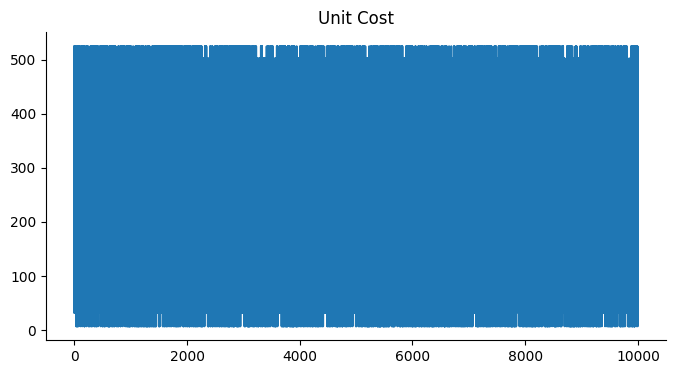

In [ ]:

df['Unit Cost'].plot(kind='line', figsize=(8, 4), title='Unit Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

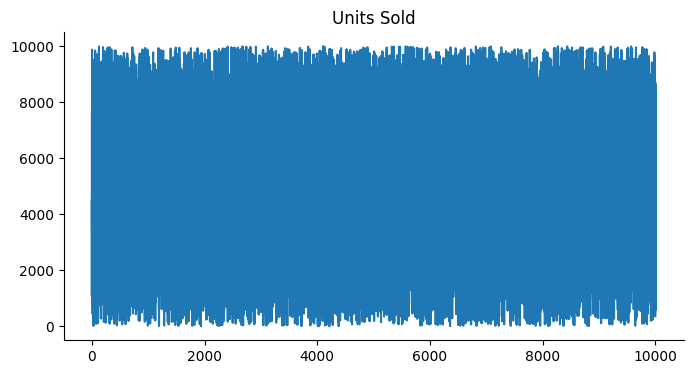

In [ ]:

df['Units Sold'].plot(kind='line', figsize=(8, 4), title='Units Sold')
plt.gca().spines[['top', 'right']].set_visible(False)

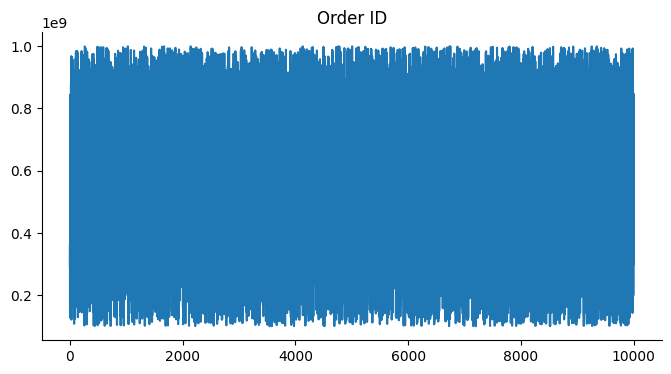

In [ ]:
df['Order ID'].plot(kind='line', figsize=(8, 4), title='Order ID')
plt.gca().spines[['top', 'right']].set_visible(False)

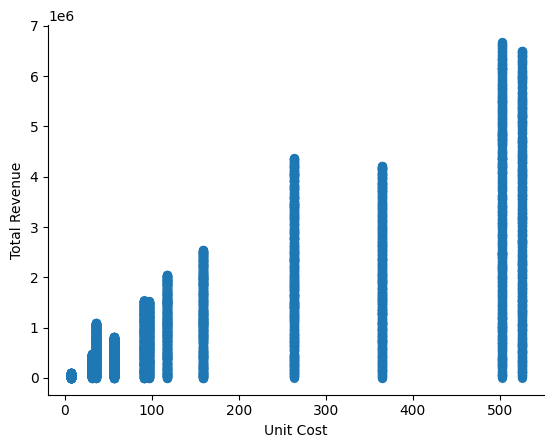

In [ ]:
df.plot(kind='scatter', x='Unit Cost', y='Total Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

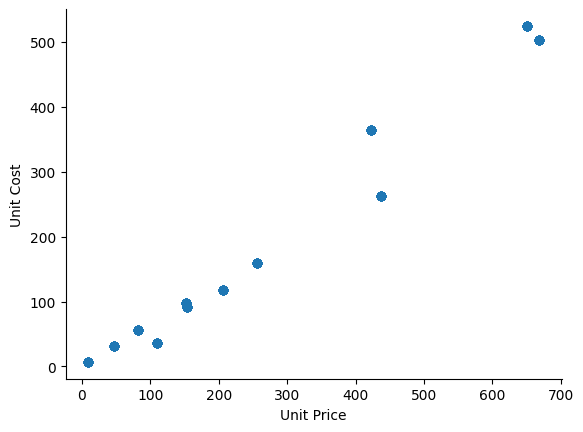

In [ ]:
df.plot(kind='scatter', x='Unit Price', y='Unit Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

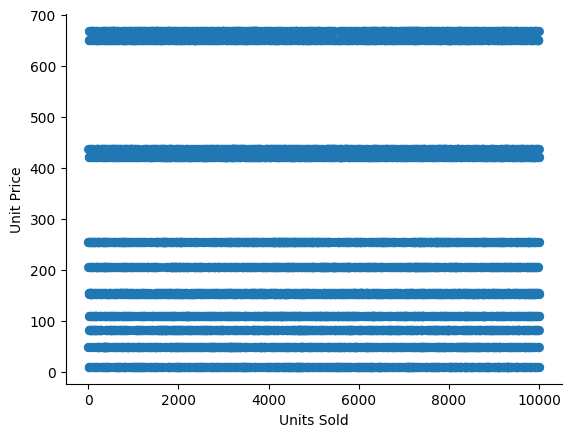

In [ ]:
df.plot(kind='scatter', x='Units Sold', y='Unit Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

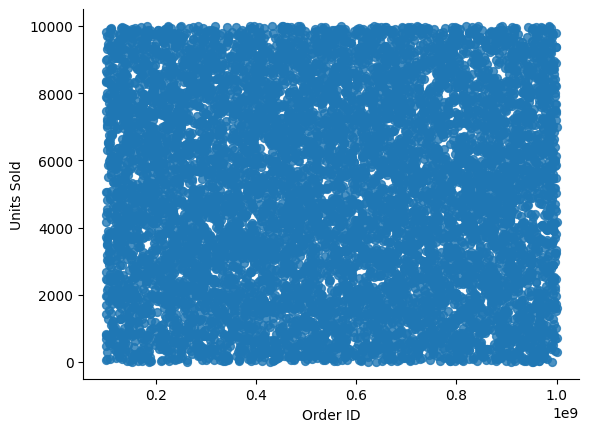

In [ ]:
df.plot(kind='scatter', x='Order ID', y='Units Sold', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

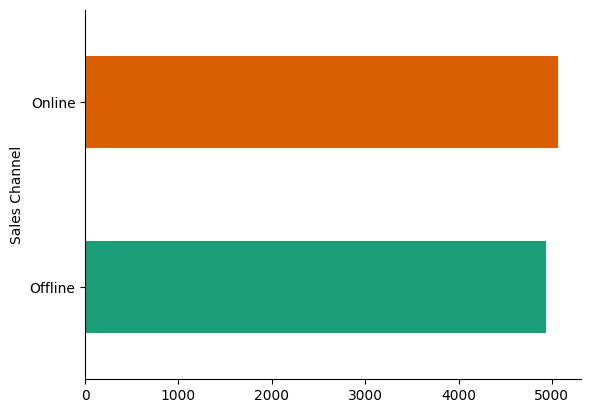

In [ ]:

df.groupby('Sales Channel').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

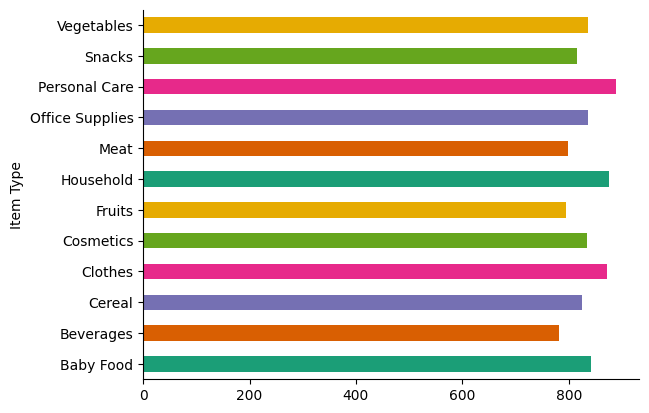

In [ ]:
df.groupby('Item Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

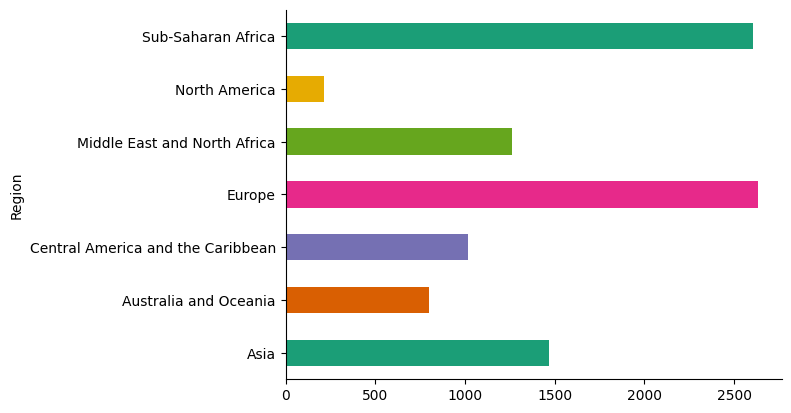

In [ ]:
df.groupby('Region').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

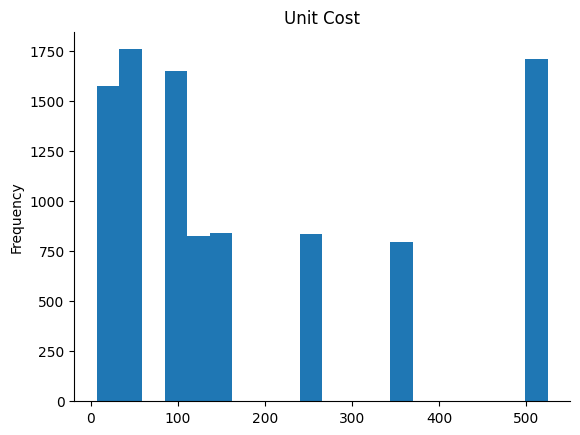

In [ ]:
df['Unit Cost'].plot(kind='hist', bins=20, title='Unit Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

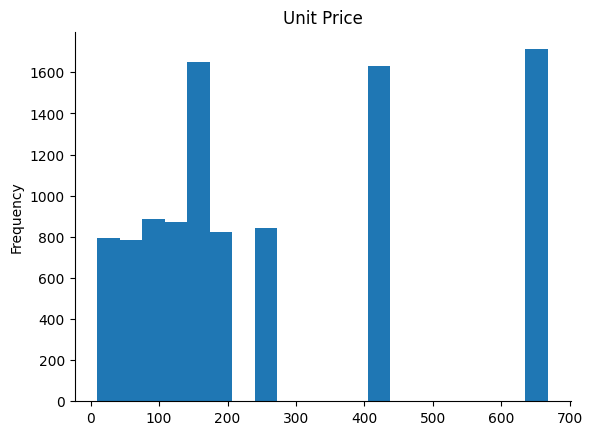

In [ ]:
df['Unit Price'].plot(kind='hist', bins=20, title='Unit Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

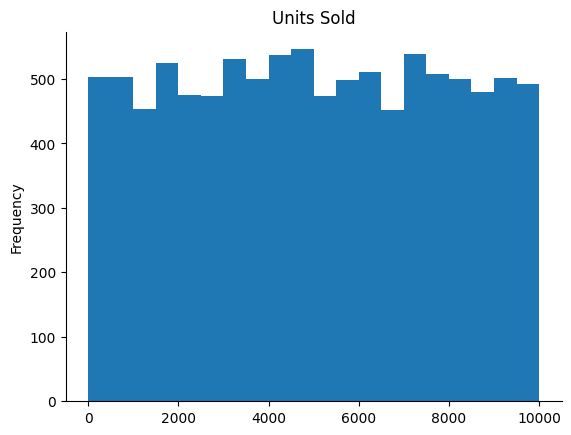

In [ ]:
df['Units Sold'].plot(kind='hist', bins=20, title='Units Sold')
plt.gca().spines[['top', 'right',]].set_visible(False)

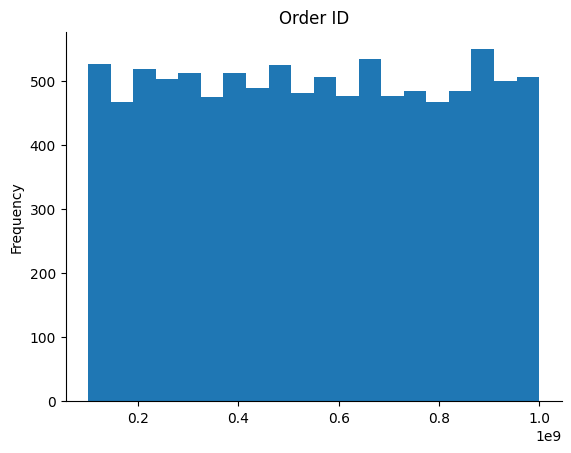

In [ ]:
df['Order ID'].plot(kind='hist', bins=20, title='Order ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          10000 non-null  object 
 1   Country         10000 non-null  object 
 2   Item Type       10000 non-null  object 
 3   Sales Channel   10000 non-null  object 
 4   Order Priority  10000 non-null  object 
 5   Order Date      10000 non-null  object 
 6   Order ID        10000 non-null  int64  
 7   Ship Date       10000 non-null  object 
 8   Units Sold      10000 non-null  int64  
 9   Unit Price      10000 non-null  float64
 10  Unit Cost       10000 non-null  float64
 11  Total Revenue   10000 non-null  float64
 12  Total Cost      10000 non-null  float64
 13  Total Profit    10000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [ ]:
df['day'] = df['Order Date'].dt.day
df['month'] = df['Order Date'].dt.month
df['quarter'] = df['Order Date'].dt.quarter
df['year'] = df['Order Date'].dt.year


In [ ]:
Region_revenue = df.groupby('Region')['Total Revenue'].sum()


In [ ]:
categorical_cols = ['Country', 'Item Type', 'Sales Channel', 'Order Priority']
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded.drop(['Region',  'Order ID', 'Ship Date','Order Date'], axis=1, inplace=True)





In [ ]:
df_encoded.head()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,day,month,quarter,year,...,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables,Sales Channel_Offline,Sales Channel_Online,Order Priority_C,Order Priority_H,Order Priority_L,Order Priority_M
0,4484,651.21,524.96,2920025.64,2353920.64,566105.00,27,1,1,2011,...,True,False,False,False,False,True,False,False,True,False
1,1075,47.45,31.79,51008.75,34174.25,16834.50,28,12,4,2015,...,False,False,False,False,False,True,True,False,False,False
2,6515,154.06,90.93,1003700.90,592408.95,411291.95,13,1,1,2011,...,False,False,False,True,True,False,True,False,False,False
3,7683,668.27,502.54,5134318.41,3861014.82,1273303.59,11,9,3,2012,...,False,False,False,False,False,True,True,False,False,False
4,3491,47.45,31.79,165647.95,110978.89,54669.06,27,10,4,2015,...,False,False,False,False,False,True,True,False,False,False


In [ ]:
df_encoded.isnull().sum()

Units Sold              0
Unit Price              0
Unit Cost               0
Total Revenue           0
Total Cost              0
                       ..
Sales Channel_Online    0
Order Priority_C        0
Order Priority_H        0
Order Priority_L        0
Order Priority_M        0
Length: 213, dtype: int64

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 213 entries, Units Sold to Order Priority_M
dtypes: bool(203), float64(5), int32(4), int64(1)
memory usage: 2.5 MB


In [ ]:
X = df_encoded.drop('Total Revenue', axis=1)
y = df_encoded['Total Revenue']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 40)

In [ ]:

model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 9.922464130340814e-10
